In [417]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [418]:
# Read data 
df = pd.read_csv('./train.csv/train.csv')

In [419]:
df.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White


In [420]:
# Remove all useless features
df.drop(columns=['AnimalID','Name','OutcomeSubtype'],inplace=True)

In [421]:
df.head()

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DateTime        26729 non-null  object
 1   OutcomeType     26729 non-null  object
 2   AnimalType      26729 non-null  object
 3   SexuponOutcome  26728 non-null  object
 4   AgeuponOutcome  26711 non-null  object
 5   Breed           26729 non-null  object
 6   Color           26729 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


In [423]:
# Check Missing values
df.isna().sum()

DateTime           0
OutcomeType        0
AnimalType         0
SexuponOutcome     1
AgeuponOutcome    18
Breed              0
Color              0
dtype: int64

In [424]:
# Dropping all na values since it is too small
df.dropna(inplace=True)

In [425]:
# Check for duplicated values
df.duplicated().sum()

438

In [426]:
df.drop_duplicates(inplace=True)

In [427]:
df.describe()

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26272,26272,26272,26272,26272,26272,26272
unique,22906,5,2,5,44,1380,366
top,2015-08-11 00:00:00,Adoption,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,15,10752,15486,9746,3948,8487,2779


In [428]:
# Univariate Analysis

In [429]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [430]:
# Analyse Animal Type column
df['AnimalType'].value_counts().reset_index()

,AnimalType,count
0,Dog,15486
1,Cat,10786


Text(0.5, 1.0, 'SexUpon Outcome Countplot')

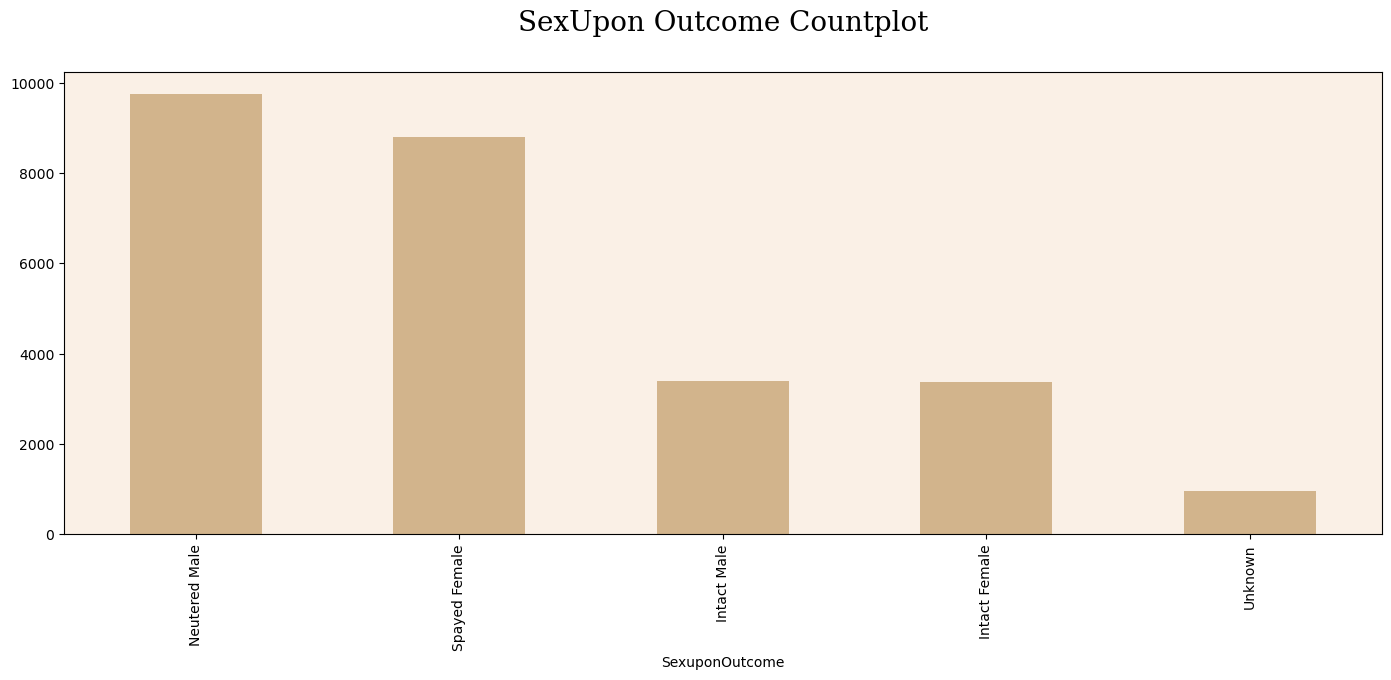

In [431]:
# Check sexuponOutcome
plt.figure(figsize=(17,6))
ax = df['SexuponOutcome'].value_counts().plot(kind='bar',color='tan',width=.5)
ax.set_facecolor('linen')
plt.title('SexUpon Outcome Countplot',fontdict={'fontfamily':'serif'},size=20,pad=30)

In [432]:
df['SexuponOutcome'] = df['SexuponOutcome'].replace('Unknown',np.nan)

In [433]:
# split sexupon Outcome
df['Sex'] = df['SexuponOutcome'].str.split(' ').str.get(-1)
df['Sex_Intact'] = df['SexuponOutcome'].str.split(' ').str.get(0)

In [434]:
df.drop(columns='SexuponOutcome',inplace=True)

In [435]:
df.dropna(inplace=True)

In [436]:
# Change AgeUponOutcome to numerics
df['AgeuponOutcome'].value_counts()

AgeuponOutcome
1 year       3836
2 years      3644
2 months     3338
3 years      1803
3 months     1229
1 month      1209
4 years      1062
5 years       984
4 months      854
6 years       666
5 months      635
6 months      565
8 years       535
7 years       527
3 weeks       493
10 months     448
10 years      441
8 months      380
2 weeks       337
9 years       286
7 months      281
4 weeks       262
12 years      234
9 months      220
11 months     164
13 years      142
11 years      125
1 weeks       102
14 years       96
15 years       85
1 week         58
3 days         49
2 days         49
16 years       35
4 days         33
1 day          24
6 days         18
17 years       17
5 weeks        10
18 years       10
0 years         9
5 days          9
19 years        3
20 years        2
Name: count, dtype: int64

In [437]:
# The age outcome is in diffrent scale ,Convert everything in days

In [438]:
df['Age_num'] = df['AgeuponOutcome'].str.split(' ').str[0]
df['Age_Scale'] = df['AgeuponOutcome'].str.split(' ').str[-1]

In [439]:
# Convert age_num all in days scale

In [440]:
df.head()

,DateTime,OutcomeType,AnimalType,AgeuponOutcome,Breed,Color,Sex,Sex_Intact,Age_num,Age_Scale
0,2014-02-12 18:22:00,Return_to_owner,Dog,1 year,Shetland Sheepdog Mix,Brown/White,Male,Neutered,1,year
1,2013-10-13 12:44:00,Euthanasia,Cat,1 year,Domestic Shorthair Mix,Cream Tabby,Female,Spayed,1,year
2,2015-01-31 12:28:00,Adoption,Dog,2 years,Pit Bull Mix,Blue/White,Male,Neutered,2,years
3,2014-07-11 19:09:00,Transfer,Cat,3 weeks,Domestic Shorthair Mix,Blue Cream,Male,Intact,3,weeks
4,2013-11-15 12:52:00,Transfer,Dog,2 years,Lhasa Apso/Miniature Poodle,Tan,Male,Neutered,2,years


In [441]:
df['Age_Scale'] = df['Age_Scale'].str.replace('s','')

In [442]:
df['Age_num'] = df['Age_num'].astype(int)

In [443]:
df['Age_days'] = np.where(df['Age_Scale']=='year',
         df['Age_num']*365, np.where(df['Age_Scale']=='week',
                                     df['Age_num']*7, np.where(df['Age_Scale']=='month',
                                                               df['Age_num']*30,df['Age_num'])
                                    ) 
        )

In [444]:
df[['Age_num','Age_Scale','Age_days']].sample(7)

,Age_num,Age_Scale,Age_days
22083,2,week,14
868,2,year,730
17615,3,year,1095
26227,2,month,60
6407,6,year,2190
14345,1,year,365
15799,1,month,30


In [445]:
# Drop all other age column
df.drop(columns=['Age_num','Age_Scale','AgeuponOutcome'],inplace=True)

In [446]:
# encode sex ,animal type, sex_inctact
df['AnimalType'] = df['AnimalType'].replace({'Dog':1,'Cat':0}).astype(int)
df['Sex'] = df['Sex'].replace({'Male':1,'Female':0}).astype(int)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_9272\1339829969.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AnimalType'] = df['AnimalType'].replace({'Dog':1,'Cat':0}).astype(int)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_9272\1339829969.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'Male':1,'Female':0}).astype(int)


In [447]:
df['Sex_Intact'] = df['Sex_Intact'].replace({'Neutered':0,'Intact':1,'Spayed':0})

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_9272\4217361093.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex_Intact'] = df['Sex_Intact'].replace({'Neutered':0,'Intact':1,'Spayed':0})


In [448]:
df['Color'].value_counts().head(40)

Color
Black/White            2668
Black                  2042
Brown Tabby            1421
White                   896
Brown/White             879
Brown Tabby/White       833
Tan/White               768
Tricolor                742
Orange Tabby            727
Black/Tan               669
Blue/White              660
Brown                   628
Tan                     618
White/Black             613
White/Brown             561
Tortie                  499
Calico                  482
Brown Brindle/White     448
Black/Brown             434
Orange Tabby/White      423
Blue                    410
Blue Tabby              393
White/Tan               388
Red                     336
Red/White               331
Brown/Black             329
Torbie                  311
Brown Brindle           228
Chocolate/White         221
Blue Tabby/White        217
Buff                    197
Sable                   195
Yellow                  185
Tan/Black               182
Cream Tabby             177
Lynx Point    

In [449]:
# I will create new 3 Most common color boolean feature
df['White_Color'] = df['Color'].str.contains(pat='White').astype(int)
df['Brown_Color'] = df['Color'].str.contains(pat='Brown').astype(int)
df['Black_Color'] = df['Color'].str.contains(pat='Black').astype(int)

In [450]:
df['OutcomeType'].value_counts()

OutcomeType
Adoption           10752
Transfer            8175
Return_to_owner     4758
Euthanasia          1452
Died                 172
Name: count, dtype: int64

In [451]:
df['Breed'].value_counts().head(15)

Breed
Domestic Shorthair Mix       7696
Pit Bull Mix                 1880
Chihuahua Shorthair Mix      1750
Labrador Retriever Mix       1331
Domestic Medium Hair Mix      785
German Shepherd Mix           568
Domestic Longhair Mix         487
Siamese Mix                   368
Australian Cattle Dog Mix     366
Dachshund Mix                 313
Boxer Mix                     235
Miniature Poodle Mix          231
Border Collie Mix             223
Australian Shepherd Mix       163
Catahoula Mix                 157
Name: count, dtype: int64

In [452]:
df['Color'].value_counts().head(15)

Color
Black/White          2668
Black                2042
Brown Tabby          1421
White                 896
Brown/White           879
Brown Tabby/White     833
Tan/White             768
Tricolor              742
Orange Tabby          727
Black/Tan             669
Blue/White            660
Brown                 628
Tan                   618
White/Black           613
White/Brown           561
Name: count, dtype: int64

In [453]:
df['DateTime'] = pd.to_datetime(df['DateTime'].dt.date)

In [454]:
date_outcome_count = pd.crosstab(df['DateTime'],df['OutcomeType']).reset_index()

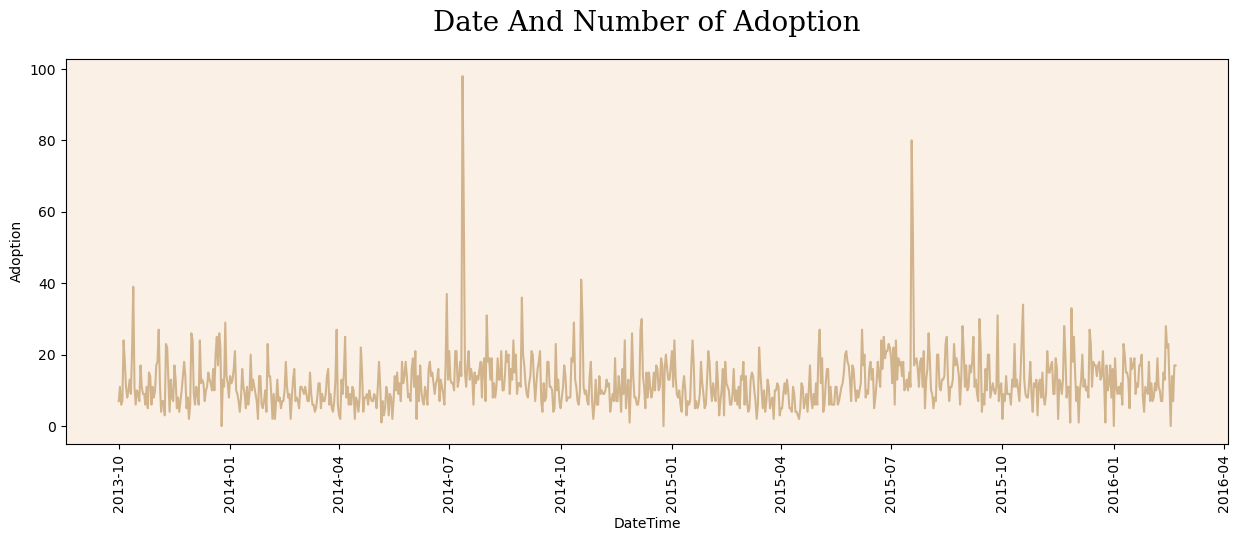

In [455]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=date_outcome_count,x='DateTime',y='Adoption',color='tan')
ax.set_facecolor('linen')
plt.xticks(rotation='vertical')
plt.title('Date And Number of Adoption',pad=20,fontdict={'fontfamily':'serif'},size=20)
plt.show()

In [456]:
date_outcome_count['DateTime'] = pd.to_datetime(date_outcome_count['DateTime'])

In [457]:
date_outcome_count['year'] = date_outcome_count.DateTime.dt.year
date_outcome_count['month'] = date_outcome_count.DateTime.dt.month

In [458]:
date_outcome_count

OutcomeType,DateTime,Adoption,Died,Euthanasia,Return_to_owner,Transfer,year,month
0,2013-10-01,7,1,5,7,11,2013,10
1,2013-10-02,11,1,2,7,22,2013,10
2,2013-10-03,6,0,1,5,8,2013,10
3,2013-10-04,7,0,2,2,1,2013,10
4,2013-10-05,24,0,1,6,15,2013,10
...,...,...,...,...,...,...,...,...
869,2016-02-17,0,0,0,4,5,2016,2
870,2016-02-18,14,0,4,4,1,2016,2
871,2016-02-19,7,0,1,4,1,2016,2
872,2016-02-20,17,0,1,8,3,2016,2


In [459]:
grp_year_sum = date_outcome_count.groupby('year')[['Adoption','Transfer']].agg('sum')

In [460]:
grp_year_sum = grp_year_sum.reset_index()

In [461]:
grp_year_sum

OutcomeType,year,Adoption,Transfer
0,2013,1128,892
1,2014,4349,3770
2,2015,4612,3187
3,2016,663,326


In [462]:
grp_year_sum = grp_year_sum.melt(id_vars='year')

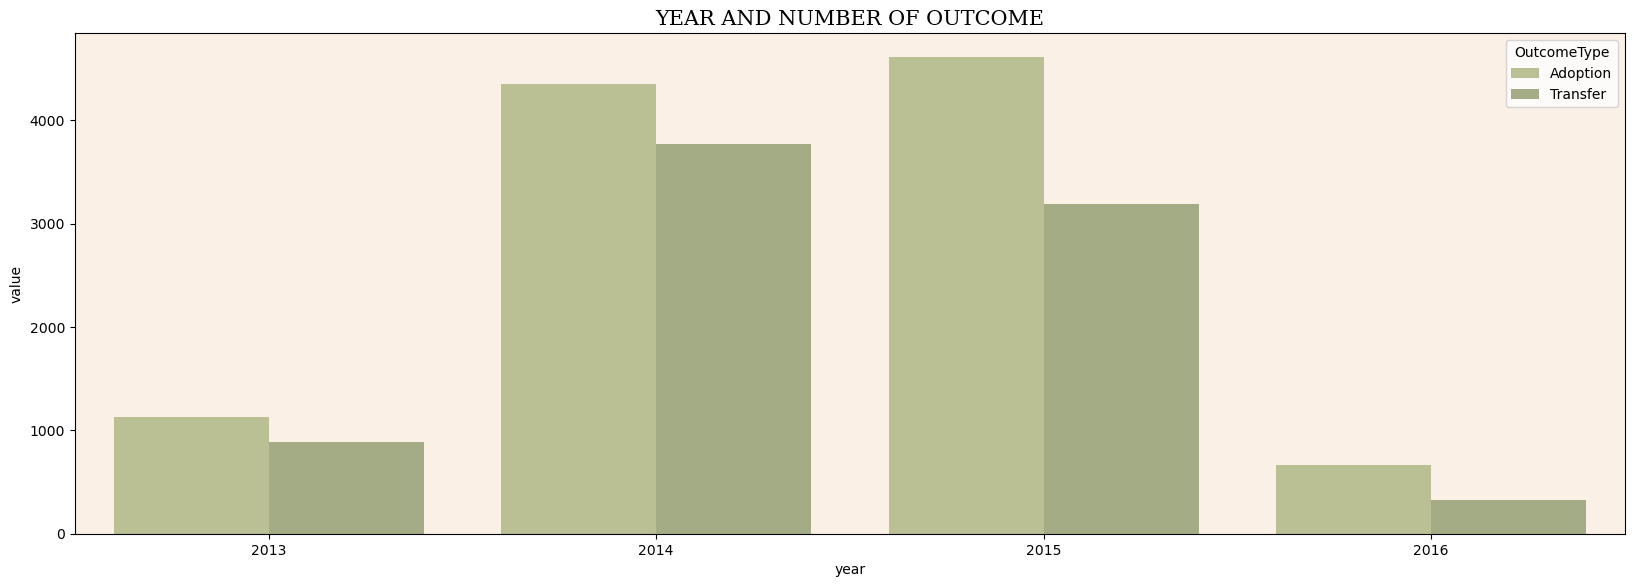

In [463]:
plt.figure(figsize=(20,6.5))
ax = sns.barplot(data=grp_year_sum,x='year',y='value',hue='OutcomeType',palette=['#C0C78C','#A6B37D'])
plt.title('YEAR AND NUMBER OF OUTCOME',fontdict={'fontfamily':'serif'},size=15)
ax.set_facecolor('linen')

In [464]:
grp_month_sum = date_outcome_count.groupby('month')[['Adoption','Transfer']].sum()

In [465]:
grp_month_sum = grp_month_sum.reset_index().melt(id_vars='month')

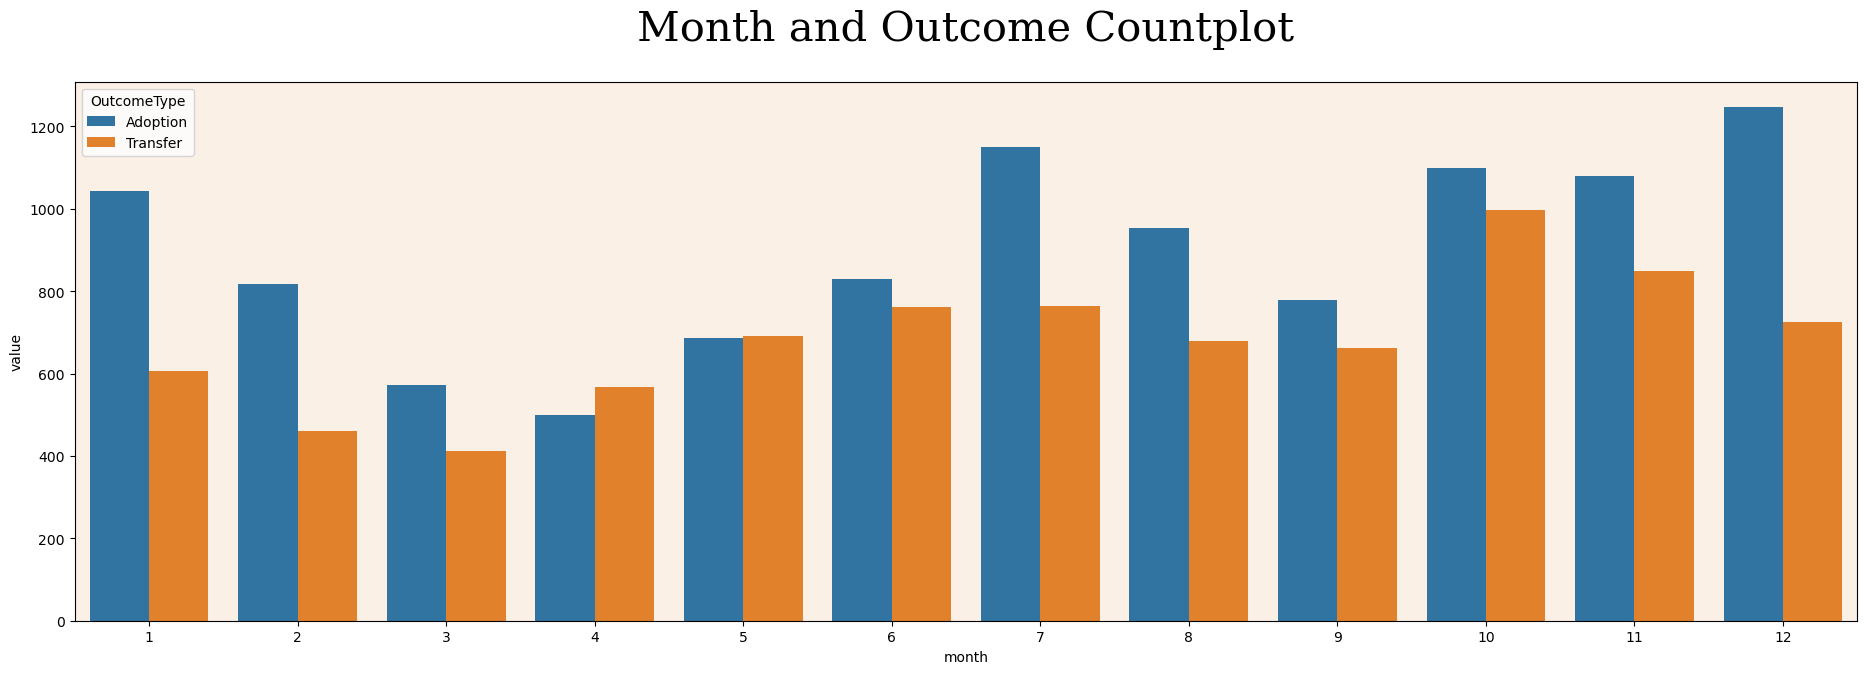

In [466]:
plt.figure(figsize=(23,7))
ax = sns.barplot(grp_month_sum,x='month',y='value',hue='OutcomeType')
ax.set_facecolor('linen')
plt.title('Month and Outcome Countplot',fontdict={'fontfamily':'serif'},size=30,pad=30)
plt.show()

In [467]:
df['DateTime']

0       2014-02-12
1       2013-10-13
2       2015-01-31
3       2014-07-11
4       2013-11-15
           ...    
26724   2015-05-14
26725   2016-01-20
26726   2015-03-09
26727   2014-04-27
26728   2015-07-02
Name: DateTime, Length: 25309, dtype: datetime64[ns]

In [468]:
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month

In [469]:
# Check if there is a relation between outcomeType and AnimalType
(pd.crosstab(df['AnimalType'],df['OutcomeType'],normalize='columns')*100).round()

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
AnimalType,,,,,
0,40.0,72.0,43.0,10.0,54.0
1,60.0,28.0,57.0,90.0,46.0


C:\Users\VICTUS\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Age_days', ylabel='Density'>

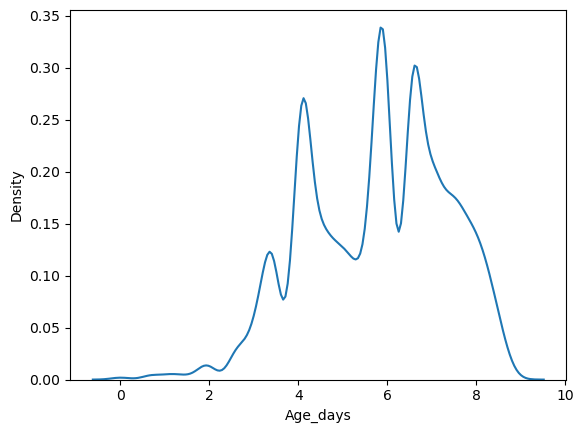

In [470]:
sns.kdeplot(np.log(df['Age_days']))

In [471]:
# One of the main things I found  very fascinating is that 90 of animals that return to their owner are dog

In [472]:
df.drop('DateTime',inplace=True,axis=1)

In [473]:
df.drop('Color',axis=1,inplace=True)

In [474]:
# Modeling

In [475]:
df['year'].unique()

array([2014, 2013, 2015, 2016])

In [476]:
common_breed = df['Breed'].value_counts().head(15).index

In [477]:
df['Breed'] = np.where(df['Breed'].isin(common_breed),df['Breed'],'other')

In [478]:
df['Age_days'] = np.log1p(df['Age_days'])

In [479]:
df['OutcomeType'] = np.where(df['OutcomeType'] == 'Adoption',1,0)

In [480]:
# split x and y

In [481]:
X = df.drop('OutcomeType',axis=1)
y = df['OutcomeType']

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42,stratify=df['OutcomeType'])

In [483]:
X_train

,AnimalType,Breed,Sex,Sex_Intact,Age_days,White_Color,Brown_Color,Black_Color,year,month
13091,0,Domestic Shorthair Mix,1,0,4.110874,1,1,0,2014,12
19006,1,other,0,0,4.510860,1,0,0,2014,11
20084,0,Domestic Shorthair Mix,0,0,4.795791,0,0,0,2014,2
8254,1,other,1,0,6.594413,1,0,0,2014,8
7119,0,Domestic Shorthair Mix,0,1,8.202756,0,0,1,2014,12
...,...,...,...,...,...,...,...,...,...,...
9063,1,other,0,0,5.484797,1,0,1,2015,11
18901,0,Domestic Shorthair Mix,0,0,7.509883,1,0,0,2013,12
2882,1,other,0,0,5.902633,1,0,1,2014,3
13140,0,Siamese Mix,1,0,6.999422,0,0,0,2015,8


In [484]:
clf = ColumnTransformer([
    ('MinMax',MinMaxScaler(),[8,9]),
    ('Std',StandardScaler(),[4]),
    ('ohe',OneHotEncoder(drop='first',sparse_output=False),[1])
],remainder='passthrough')

In [485]:
pd.DataFrame(clf.fit_transform(X_train),columns=clf.get_feature_names_out()).head(2)

,MinMax__year,MinMax__month,Std__Age_days,ohe__Breed_Australian Shepherd Mix,ohe__Breed_Border Collie Mix,ohe__Breed_Boxer Mix,ohe__Breed_Catahoula Mix,ohe__Breed_Chihuahua Shorthair Mix,ohe__Breed_Dachshund Mix,ohe__Breed_Domestic Longhair Mix,...,ohe__Breed_Miniature Poodle Mix,ohe__Breed_Pit Bull Mix,ohe__Breed_Siamese Mix,ohe__Breed_other,remainder__AnimalType,remainder__Sex,remainder__Sex_Intact,remainder__White_Color,remainder__Brown_Color,remainder__Black_Color
0,0.333333,1.000000,-1.064326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.333333,0.909091,-0.807385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [486]:
pipe_model = Pipeline([
    ('transform',clf),
    ('train',RandomForestClassifier(n_estimators=150,max_depth=100))
])

In [487]:
pipe_model.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('MinMax', MinMaxScaler(),
                                                  [8, 9]),
                                                 ('Std', StandardScaler(), [4]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [1])])),
                ('train',
                 RandomForestClassifier(max_depth=100, n_estimators=150))])

In [488]:
pipe_model.score(X_train,y_train)

0.921815577616437

In [489]:
y_pred = pipe_model.predict(X_test)

In [490]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2912
           1       0.67      0.68      0.67      2150

    accuracy                           0.72      5062
   macro avg       0.72      0.72      0.72      5062
weighted avg       0.72      0.72      0.72      5062



<Axes: >

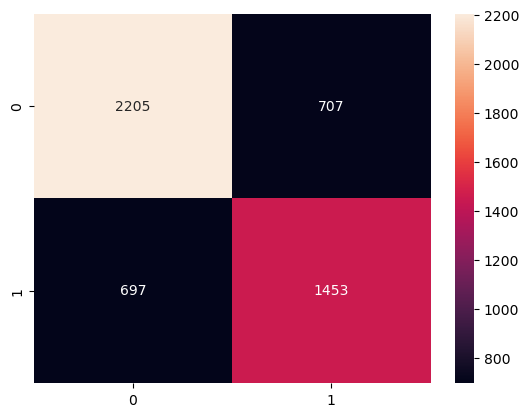

In [491]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [492]:
models = [
    ('rdf',RandomForestClassifier()),
    ('svm',SVC()),
    ('neigb',KNeighborsClassifier())
]
vc = VotingClassifier(estimators=models,n_jobs=4)

In [493]:
pipe_model = Pipeline([
    ('transform',clf),
    ('train',vc)
])


In [494]:
pipe_model.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('MinMax', MinMaxScaler(),
                                                  [8, 9]),
                                                 ('Std', StandardScaler(), [4]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [1])])),
                ('train',
                 VotingClassifier(estimators=[('rdf', RandomForestClassifier()),
                                              ('svm', SVC()),
                                              ('neigb',
                                               KNeighborsClassifier())],
                                  n_jobs=4))])

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      2912
           1       0.70      0.68      0.69      2150

    accuracy                           0.74      5062
   macro avg       0.74      0.73      0.73      5062
weighted avg       0.74      0.74      0.74      5062



<Axes: >

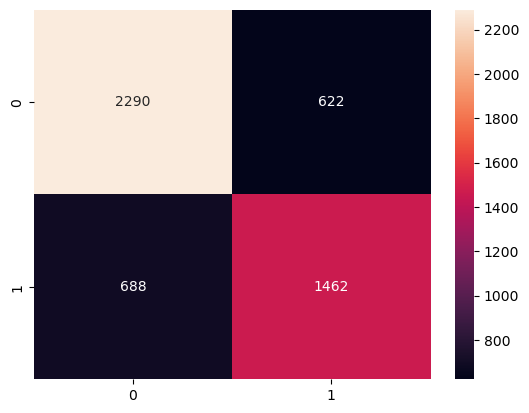

In [495]:
y_pred = pipe_model.predict(X_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [496]:
st = StackingClassifier(estimators=models,final_estimator=RandomForestClassifier(n_estimators=200))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      2912
           1       0.67      0.65      0.66      2150

    accuracy                           0.71      5062
   macro avg       0.71      0.71      0.71      5062
weighted avg       0.71      0.71      0.71      5062



<Axes: >

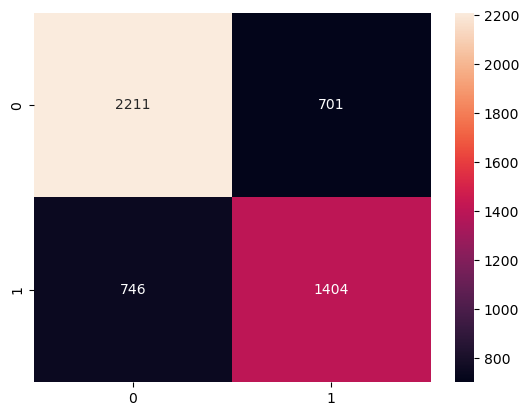

In [497]:
pipe_model = Pipeline([
    ('transform',clf),
    ('train',st)
])
pipe_model.fit(X_train,y_train)
y_pred = pipe_model.predict(X_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')